In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import metrics

In [4]:
# helper function

def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()

In [5]:
df = pd.read_excel(r'C:\Users\HAXY8W\Desktop\Brands\Scania\Inbound_Logistics_Consulting\dec_grouped1.xlsx')

In [6]:
df.rename(columns = {'dist_country_1.1':'dist_city_1', 'dist_country_2.1':'dist_city_2',
                    'dist_country_3.1':'dist_city_3', 'dist_country_4.1':'dist_city_4',
                    'dist_country_5.1':'dist_city_5'}, inplace = True)

In [7]:
df.head()

,Load no,Country TO consignor,City TO consignor,Cost desc,Transpot_count,Bill_count,pricing_category,amount,dist_country_1,dist_country_2,dist_country_3,dist_country_4,dist_country_5,dist_city_1,dist_city_2,dist_city_3,dist_city_4,dist_city_5,dist_city_6,dist_city_7,dist_city_8,dist_city_9,dist_city_10,dist_city_11,leg_consignor_name_1,leg_consignor_name_2,leg_consignor_name_3,leg_consignor_name_4,leg_consignee_city_1,leg_consignee_city_2,leg_consignee_city_3,leg_consignee_city_4,leg_consignee_city_5,leg_consignee_name_1,leg_consignee_name_2,leg_consignee_name_3,leg_consignee_name_4,leg_consignee_name_5
0,1428428,SE,Järna,Freight Charges,1,1,16000_16999_kg,1355.56,SE,0,0,0,0,KALIX,0,0,0,0,0,0,0,0,0,0,VIDA PACKAGING LOGISTICS AB,0,0,0,KALIX,0,0,0,0,ANVA COMPONENTS AB,0,0,0,0
1,1428428,SE,Järna,Fuel Surcharges,1,1,not_lm_kg,6.96,SE,0,0,0,0,KALIX,0,0,0,0,0,0,0,0,0,0,VIDA PACKAGING LOGISTICS AB,0,0,0,KALIX,0,0,0,0,ANVA COMPONENTS AB,0,0,0,0
2,1535615,DE,BAD KISSINGEN,Waiting time (consignor),3,1,not_lm_kg,96.00,NL,0,0,0,0,Zwolle,Hasselt,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Hasselt,Zwolle,0,0,0,Scania CV AB,Scania Production Zwolle,0,0,0
3,1535615,DE,BAD KISSINGEN,Waiting time Supplier,3,1,not_lm_kg,203.50,NL,0,0,0,0,Hasselt,Zwolle,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Hasselt,Zwolle,0,0,0,Scania CV AB,Scania Production Zwolle,0,0,0
4,1537055,DE,BAD KISSINGEN,Waiting time (consignor),2,1,not_lm_kg,162.50,NL,0,0,0,0,Meppel,Zwolle,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Meppel,Zwolle,0,0,0,Scania Production Meppel,Scania Production Zwolle,0,0,0


In [8]:
df.replace(np.nan, 0, inplace=True)

In [9]:
dest_countries = ['dist_country_1', 'dist_country_2','dist_country_3', 'dist_country_4', 'dist_country_5']
dest_cities = ['dist_city_1', 'dist_city_2','dist_city_3','dist_city_4', 'dist_city_5', 'dist_city_6', 
               'dist_city_7', 'dist_city_8', 'dist_city_9', 'dist_city_10', 'dist_city_11']

leg_consignor_name = ['leg_consignor_name_1','leg_consignor_name_2','leg_consignor_name_3','leg_consignor_name_4']

leg_consignee_city = ['leg_consignee_city_1','leg_consignee_city_2','leg_consignee_city_3','leg_consignee_city_4',
                      'leg_consignee_city_5']

leg_consignee_name = ['leg_consignee_name_1','leg_consignee_name_2','leg_consignee_name_3','leg_consignee_name_4',
                      'leg_consignee_name_5']


df['dest_counties_count'] = df[dest_countries].astype(bool).sum(axis='columns')
df['dest_cities_count'] = df[dest_cities].astype(bool).sum(axis='columns')
df['leg_consignor_name_count'] = df[leg_consignor_name].astype(bool).sum(axis='columns')
df['leg_consignee_city_count'] = df[leg_consignee_city].astype(bool).sum(axis='columns')
df['leg_consignee_name_count'] = df[leg_consignee_name].astype(bool).sum(axis='columns')

In [10]:
df.head()

,Load no,Country TO consignor,City TO consignor,Cost desc,Transpot_count,Bill_count,pricing_category,amount,dist_country_1,dist_country_2,dist_country_3,dist_country_4,dist_country_5,dist_city_1,dist_city_2,dist_city_3,dist_city_4,dist_city_5,dist_city_6,dist_city_7,dist_city_8,dist_city_9,dist_city_10,dist_city_11,leg_consignor_name_1,leg_consignor_name_2,leg_consignor_name_3,leg_consignor_name_4,leg_consignee_city_1,leg_consignee_city_2,leg_consignee_city_3,leg_consignee_city_4,leg_consignee_city_5,leg_consignee_name_1,leg_consignee_name_2,leg_consignee_name_3,leg_consignee_name_4,leg_consignee_name_5,dest_counties_count,dest_cities_count,leg_consignor_name_count,leg_consignee_city_count,leg_consignee_name_count
0,1428428,SE,Järna,Freight Charges,1,1,16000_16999_kg,1355.56,SE,0,0,0,0,KALIX,0,0,0,0,0,0,0,0,0,0,VIDA PACKAGING LOGISTICS AB,0,0,0,KALIX,0,0,0,0,ANVA COMPONENTS AB,0,0,0,0,1,1,1,1,1
1,1428428,SE,Järna,Fuel Surcharges,1,1,not_lm_kg,6.96,SE,0,0,0,0,KALIX,0,0,0,0,0,0,0,0,0,0,VIDA PACKAGING LOGISTICS AB,0,0,0,KALIX,0,0,0,0,ANVA COMPONENTS AB,0,0,0,0,1,1,1,1,1
2,1535615,DE,BAD KISSINGEN,Waiting time (consignor),3,1,not_lm_kg,96.00,NL,0,0,0,0,Zwolle,Hasselt,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Hasselt,Zwolle,0,0,0,Scania CV AB,Scania Production Zwolle,0,0,0,1,2,1,2,2
3,1535615,DE,BAD KISSINGEN,Waiting time Supplier,3,1,not_lm_kg,203.50,NL,0,0,0,0,Hasselt,Zwolle,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Hasselt,Zwolle,0,0,0,Scania CV AB,Scania Production Zwolle,0,0,0,1,2,1,2,2
4,1537055,DE,BAD KISSINGEN,Waiting time (consignor),2,1,not_lm_kg,162.50,NL,0,0,0,0,Meppel,Zwolle,0,0,0,0,0,0,0,0,0,JOYSON SAFETY SYSTEMS PLASTEC GMBH,0,0,0,Meppel,Zwolle,0,0,0,Scania Production Meppel,Scania Production Zwolle,0,0,0,1,2,1,2,2


In [11]:
drop_list = dest_countries + dest_cities + leg_consignor_name + leg_consignee_city + leg_consignee_name
drop_list

['dist_country_1',
 'dist_country_2',
 'dist_country_3',
 'dist_country_4',
 'dist_country_5',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'dist_city_4',
 'dist_city_5',
 'dist_city_6',
 'dist_city_7',
 'dist_city_8',
 'dist_city_9',
 'dist_city_10',
 'dist_city_11',
 'leg_consignor_name_1',
 'leg_consignor_name_2',
 'leg_consignor_name_3',
 'leg_consignor_name_4',
 'leg_consignee_city_1',
 'leg_consignee_city_2',
 'leg_consignee_city_3',
 'leg_consignee_city_4',
 'leg_consignee_city_5',
 'leg_consignee_name_1',
 'leg_consignee_name_2',
 'leg_consignee_name_3',
 'leg_consignee_name_4',
 'leg_consignee_name_5']

In [12]:
df_smaller = df.drop(columns=drop_list)

In [13]:
df_smaller.head()

,Load no,Country TO consignor,City TO consignor,Cost desc,Transpot_count,Bill_count,pricing_category,amount,dest_counties_count,dest_cities_count,leg_consignor_name_count,leg_consignee_city_count,leg_consignee_name_count
0,1428428,SE,Järna,Freight Charges,1,1,16000_16999_kg,1355.56,1,1,1,1,1
1,1428428,SE,Järna,Fuel Surcharges,1,1,not_lm_kg,6.96,1,1,1,1,1
2,1535615,DE,BAD KISSINGEN,Waiting time (consignor),3,1,not_lm_kg,96.00,1,2,1,2,2
3,1535615,DE,BAD KISSINGEN,Waiting time Supplier,3,1,not_lm_kg,203.50,1,2,1,2,2
4,1537055,DE,BAD KISSINGEN,Waiting time (consignor),2,1,not_lm_kg,162.50,1,2,1,2,2


**Now clustering based on smaller datasets**

In [14]:
df_smaller.set_index('Load no')

,Country TO consignor,City TO consignor,Cost desc,Transpot_count,Bill_count,pricing_category,amount,dest_counties_count,dest_cities_count,leg_consignor_name_count,leg_consignee_city_count,leg_consignee_name_count
Load no,,,,,,,,,,,,
1428428,SE,Järna,Freight Charges,1,1,16000_16999_kg,1355.56,1,1,1,1,1
1428428,SE,Järna,Fuel Surcharges,1,1,not_lm_kg,6.96,1,1,1,1,1
1535615,DE,BAD KISSINGEN,Waiting time (consignor),3,1,not_lm_kg,96.00,1,2,1,2,2
1535615,DE,BAD KISSINGEN,Waiting time Supplier,3,1,not_lm_kg,203.50,1,2,1,2,2
1537055,DE,BAD KISSINGEN,Waiting time (consignor),2,1,not_lm_kg,162.50,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1721306,SE,FALUN,Freight Charges,2,1,5000_5999_kg,171.21,2,2,1,1,1
1721306,SE,FALUN,Fuel Surcharges,2,1,not_lm_kg,10.76,2,2,1,1,1
1721385,FR,QUIMPER,Freight Charges,1,1,14000_14999_kg,497.70,1,1,1,1,1


In [15]:
df_smaller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165063 entries, 0 to 165062
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Load no                   165063 non-null  int64  
 1   Country TO consignor      165063 non-null  object 
 2   City TO consignor         165063 non-null  object 
 3   Cost desc                 165063 non-null  object 
 4   Transpot_count            165063 non-null  int64  
 5   Bill_count                165063 non-null  int64  
 6   pricing_category          165063 non-null  object 
 7   amount                    165063 non-null  float64
 8   dest_counties_count       165063 non-null  int64  
 9   dest_cities_count         165063 non-null  int64  
 10  leg_consignor_name_count  165063 non-null  int64  
 11  leg_consignee_city_count  165063 non-null  int64  
 12  leg_consignee_name_count  165063 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory us

In [16]:
df_smaller.drop(columns='pricing_category', inplace=True)

In [17]:
df_smaller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165063 entries, 0 to 165062
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Load no                   165063 non-null  int64  
 1   Country TO consignor      165063 non-null  object 
 2   City TO consignor         165063 non-null  object 
 3   Cost desc                 165063 non-null  object 
 4   Transpot_count            165063 non-null  int64  
 5   Bill_count                165063 non-null  int64  
 6   amount                    165063 non-null  float64
 7   dest_counties_count       165063 non-null  int64  
 8   dest_cities_count         165063 non-null  int64  
 9   leg_consignor_name_count  165063 non-null  int64  
 10  leg_consignee_city_count  165063 non-null  int64  
 11  leg_consignee_name_count  165063 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.1+ MB


In [18]:
categorical_features = ['Country TO consignor','City TO consignor','Cost desc']
numerica_features =['Transpot_count','Bill_count','amount','dest_counties_count',
                    'dest_cities_count','leg_consignor_name_count','leg_consignee_city_count','leg_consignee_name_count']

In [19]:
df_smaller[categorical_features] = df_smaller[categorical_features].astype(str)

In [20]:
onh = OneHotEncoder()
sc = StandardScaler()

ct = make_column_transformer((onh,categorical_features),(sc,numerica_features))



transformed = ct.fit_transform(df_smaller)

In [21]:
ct.fit_transform(df_smaller)

<165063x1359 sparse matrix of type '<class 'numpy.float64'>'
	with 1815693 stored elements in Compressed Sparse Row format>

C:\Users\HAXY8W\Anaconda3\envs\general\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\HAXY8W\Anaconda3\envs\general\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\HAXY8W\Anaconda3\envs\general\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warning

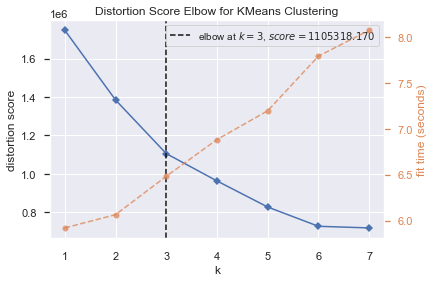

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(transformed) 
visualizer.poof()

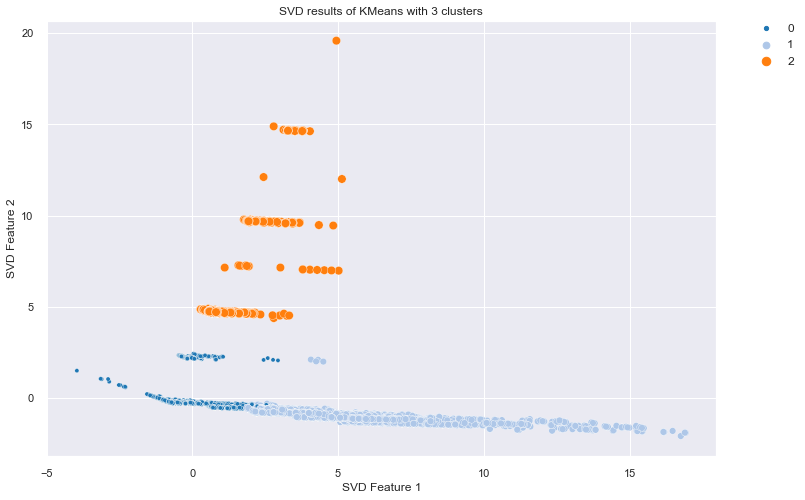

In [29]:
svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(transformed)
x = svd_features[:,0]
y = svd_features[:,1]

K=3

kmeans = KMeans(n_clusters=K, random_state=42)
cl_labels = kmeans.fit_predict(transformed)
df_svd_features = pd.DataFrame({'cluster_id': cl_labels,
                                'pc_1':x,
                                'pc_2':y})
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='pc_1', y='pc_2',
                hue='cluster_id',
                size='cluster_id',
                data=df_svd_features,
                palette='tab20',
                legend='full')
ax.set_xlabel('SVD Feature 1')
ax.set_ylabel('SVD Feature 2')
ax.set_title('SVD results of KMeans with ' + str(K) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

**There seem to be extreme outliers, for SVD features 1 all super wide range. Additionally the negative values!**

The only explanation I can come up with to negative values are the less that zero load numbers

In [33]:
svd.get_params()

{'algorithm': 'randomized',
 'n_components': 2,
 'n_iter': 5,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'tol': 0.0}

In [36]:
svd.explained_variance_ratio_

array([0.26209665, 0.18553697])

In [37]:
svd.explained_variance_ratio_.sum()

0.4476336173150431

In [39]:
svd.n_features_in_

1359

In [40]:
svd.components_

array([[-4.00858958e-04, -4.63587352e-05, -1.28497509e-03, ...,
         8.74118078e-02,  9.37623774e-02,  8.71859676e-02],
       [ 1.13016320e-03, -3.25861315e-05, -1.24532551e-03, ...,
        -8.34408574e-03,  6.94281642e-01,  6.95285150e-01]])

In [31]:
df_smaller['clusters'] = cl_labels

In [32]:
df_smaller['clusters'].value_counts()

0    140309
1     16920
2      7834
Name: clusters, dtype: int64

<AxesSubplot:ylabel='clusters'>

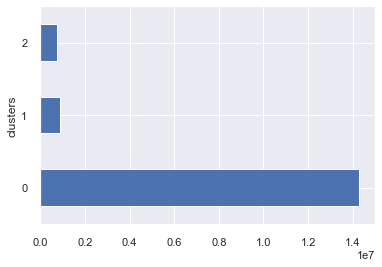

In [42]:
df_smaller.groupby('clusters')['amount'].sum().plot(kind='barh')

<AxesSubplot:xlabel='amount', ylabel='Count'>

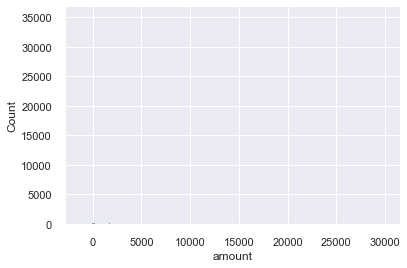

In [49]:
sns.histplot(df_smaller[df_smaller['clusters']==0]['amount'])



C:\Users\HAXY8W\Anaconda3\envs\general\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

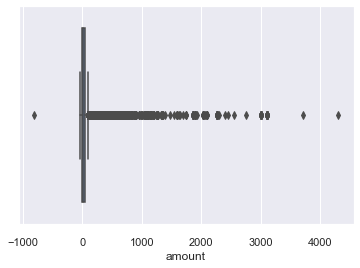

In [52]:
sns.boxplot(df_smaller[df_smaller['clusters']==2]['amount'])

---
**DBSCAN**

In [54]:
db = DBSCAN(eps=0.3, min_samples=10).fit(transformed)

In [55]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [60]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(transformed, labels))

Estimated number of clusters: 3298
Estimated number of noise points: 60975


*Not realistic that we got 3298 clusters with that much noise data point!!*